In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import requests
import json

## 가공한 교통 인프라 변수 불러오기 및 지역구 면적 합치기

In [3]:
geo=pd.read_csv("행정구역(구별)_20230816141558.csv")
transport=pd.read_csv('교통.csv')

In [4]:
transport.drop(['Unnamed: 0','지역구.1'],inplace=True,	axis=1)

In [5]:
transport

,지역구,버스 정류장수,전철역 수
0,강남구,616,35
1,강동구,439,15
2,강북구,489,11
3,강서구,694,21
4,관악구,508,10
5,광진구,322,11
6,구로구,619,13
7,금천구,394,4
8,노원구,587,16
9,도봉구,429,7


In [6]:
geo_new=pd.concat([geo['2022'],geo['자치구별(2)']],axis=1,ignore_index=True)

In [7]:
geo_new.drop([0,1],inplace=True)

In [8]:
geo_new.columns=['면적 (km²)','자치구']

In [9]:
geo_new.sort_values(by='자치구' ,ascending=True,inplace=True)
geo_new

,면적 (km²),자치구
25,39.50,강남구
27,24.59,강동구
11,23.60,강북구
18,41.45,강서구
23,29.57,관악구
7,17.06,광진구
19,20.12,구로구
20,13.02,금천구
13,35.44,노원구
12,20.65,도봉구


In [10]:
total=dict(geo_new.loc[2])
geo_new.drop([2],inplace=True)
geo_new.reset_index(drop=True,inplace=True)

In [11]:
total

{'면적 (km²)': '605.21', '자치구': '소계'}

In [12]:
geo_new.loc[25]=total

In [13]:
geo_new

,면적 (km²),자치구
0,39.50,강남구
1,24.59,강동구
2,23.60,강북구
3,41.45,강서구
4,29.57,관악구
5,17.06,광진구
6,20.12,구로구
7,13.02,금천구
8,35.44,노원구
9,20.65,도봉구


##  인프라 점수 (버스 정류장수 + 전철역수)/면적 = 면적당 대중교통 승강장 수

In [14]:
transport_new=pd.concat([transport,geo_new],axis=1)

In [15]:
transport_new.drop('자치구',axis=1,inplace=True)

In [16]:
transport_new['인프라 점수']=None

In [17]:
transport_new

,지역구,버스 정류장수,전철역 수,면적 (km²),인프라 점수
0,강남구,616.0,35.0,39.50,None
1,강동구,439.0,15.0,24.59,None
2,강북구,489.0,11.0,23.60,None
3,강서구,694.0,21.0,41.45,None
4,관악구,508.0,10.0,29.57,None
5,광진구,322.0,11.0,17.06,None
6,구로구,619.0,13.0,20.12,None
7,금천구,394.0,4.0,13.02,None
8,노원구,587.0,16.0,35.44,None
9,도봉구,429.0,7.0,20.65,None


## 인프라점수와  대중교통이용 만족도를 같이 고려해보기 위함

In [18]:
satisf=pd.read_csv("교통인프라/교통이용+만족도(2005년+이후)_20230816171406.csv")

In [19]:
satisf2=satisf.loc[2:]

In [20]:
satisf

,구분별(1),구분별(2),구분별(3),2022,2022.1,2022.2,2022.3,2022.4
0,구분별(1),구분별(2),구분별(3),대중교통이용만족도,대중교통수단별이용만족도,대중교통수단별이용만족도,대중교통수단별이용만족도,대중교통수단별이용만족도
1,구분별(1),구분별(2),구분별(3),소계,버스,지하철,택시,시외버스/고속버스
2,서울시,소계,소계,6.65,7.27,7.41,5.79,5.89
3,서울시,지역소분류,종로구,6.97,7.79,7.56,6.28,6.12
4,서울시,지역소분류,중구,6.75,7.31,7.54,5.71,6.21
5,서울시,지역소분류,용산구,7.00,7.12,7.59,6.23,6.73
6,서울시,지역소분류,성동구,7.03,7.30,7.64,6.53,6.59
7,서울시,지역소분류,광진구,6.35,6.90,6.94,5.59,5.98
8,서울시,지역소분류,동대문구,6.89,7.47,7.46,6.01,6.47
9,서울시,지역소분류,중랑구,6.39,7.21,7.19,5.54,5.63


In [21]:
satisf2.sort_values(by='구분별(3)' ,ascending=True,inplace=True)
satisf2.reset_index(drop=True,inplace=True)
satisf2.drop([17],inplace=True)
satisf2.reset_index(drop=True,inplace=True)
satisf2

C:\Users\HyungHu\AppData\Local\Temp\ipykernel_16844\1256784127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisf2.sort_values(by='구분별(3)' ,ascending=True,inplace=True)
C:\Users\HyungHu\AppData\Local\Temp\ipykernel_16844\1256784127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisf2.drop([17],inplace=True)


,구분별(1),구분별(2),구분별(3),2022,2022.1,2022.2,2022.3,2022.4
0,서울시,지역소분류,강남구,5.96,6.29,6.75,5.06,5.80
1,서울시,지역소분류,강동구,6.85,7.23,7.33,6.33,6.57
2,서울시,지역소분류,강북구,7.07,7.53,7.83,6.32,6.39
3,서울시,지역소분류,강서구,6.94,7.71,7.55,6.22,6.20
4,서울시,지역소분류,관악구,6.66,7.15,7.27,5.85,5.70
5,서울시,지역소분류,광진구,6.35,6.90,6.94,5.59,5.98
6,서울시,지역소분류,구로구,6.70,7.54,8.09,5.38,5.59
7,서울시,지역소분류,금천구,6.74,7.43,7.15,6.09,5.87
8,서울시,지역소분류,노원구,6.75,7.45,7.73,5.65,5.73
9,서울시,지역소분류,도봉구,7.43,7.70,8.00,6.77,6.82


In [24]:
satisf2['2022']

0     5.96
1     6.85
2     7.07
3     6.94
4     6.66
5     6.35
6     6.70
7     6.74
8     6.75
9     7.43
10    6.89
11    6.65
12    6.31
13    6.50
14    6.75
15    7.03
16    7.01
17    7.01
18    5.93
19    5.54
20    7.00
21    6.63
22    6.97
23    6.75
24    6.39
Name: 2022, dtype: object

In [25]:
transport_new2=pd.concat([transport_new,satisf2['2022']],axis=1)
transport_new2.rename(columns={'2022':'대중교통이용만족도(2022)'},inplace=True)

In [26]:
transport_new2.drop('인프라 점수',axis=1,inplace=True)

In [27]:
transport_new2['면적당 버스정류장 수']=None
transport_new2['면적당 전철역 수']=None
transport_new2.drop(25,axis=0,inplace=True)
transport_new2

,지역구,버스 정류장수,전철역 수,면적 (km²),대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수
0,강남구,616.0,35.0,39.50,5.96,None,None
1,강동구,439.0,15.0,24.59,6.85,None,None
2,강북구,489.0,11.0,23.60,7.07,None,None
3,강서구,694.0,21.0,41.45,6.94,None,None
4,관악구,508.0,10.0,29.57,6.66,None,None
5,광진구,322.0,11.0,17.06,6.35,None,None
6,구로구,619.0,13.0,20.12,6.70,None,None
7,금천구,394.0,4.0,13.02,6.74,None,None
8,노원구,587.0,16.0,35.44,6.75,None,None
9,도봉구,429.0,7.0,20.65,7.43,None,None


In [28]:
for i in np.arange(0,25):
    transport_new2['면적당 버스정류장 수'][i]=float(transport_new2['버스 정류장수'][i])/float(transport_new2['면적 (km²)'][i])
    transport_new2['면적당 전철역 수'][i]=float(transport_new2['전철역 수'][i])/float(transport_new2['면적 (km²)'][i])

transport_new2

C:\Users\HyungHu\AppData\Local\Temp\ipykernel_16844\4022838958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_new2['면적당 버스정류장 수'][i]=float(transport_new2['버스 정류장수'][i])/float(transport_new2['면적 (km²)'][i])
C:\Users\HyungHu\AppData\Local\Temp\ipykernel_16844\4022838958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_new2['면적당 전철역 수'][i]=float(transport_new2['전철역 수'][i])/float(transport_new2['면적 (km²)'][i])


,지역구,버스 정류장수,전철역 수,면적 (km²),대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수
0,강남구,616.0,35.0,39.50,5.96,15.594937,0.886076
1,강동구,439.0,15.0,24.59,6.85,17.852786,0.610004
2,강북구,489.0,11.0,23.60,7.07,20.720339,0.466102
3,강서구,694.0,21.0,41.45,6.94,16.743064,0.506634
4,관악구,508.0,10.0,29.57,6.66,17.179574,0.338181
5,광진구,322.0,11.0,17.06,6.35,18.87456,0.644783
6,구로구,619.0,13.0,20.12,6.70,30.765408,0.646123
7,금천구,394.0,4.0,13.02,6.74,30.261137,0.30722
8,노원구,587.0,16.0,35.44,6.75,16.563205,0.451467
9,도봉구,429.0,7.0,20.65,7.43,20.774818,0.338983


In [29]:
speed=pd.read_csv("교통인프라/차량통행속도(월별_구별)_20230821163046.csv")
speed.sort_values(by='구분별(2)' ,ascending=True,inplace=True)
speed.reset_index(drop=True,inplace=True)
speed[['구분별(2)','2021','2022']]
#강남, 강북이라 되어있는 것들은 강남에 있는 자치구들의 평균, 강북에 있는 자치구들의 평균이라 무의미한 rows여서 drop한다.

,구분별(2),2021,2022
0,강남,23.3,23.6
1,강남구,23.7,23.5
2,강동구,22.4,22.5
3,강북,22.7,22.6
4,강북구,20.8,20.3
5,강서구,22.7,22.3
6,관악구,24.6,24.9
7,광진구,23.8,23.8
8,구로구,22.3,22.6
9,금천구,22.2,22.7


In [30]:
speed.drop([0,3,19],inplace=True)
speed.reset_index(drop=True,inplace=True)
speed[['구분별(2)','2021','2022']]

,구분별(2),2021,2022
0,강남구,23.7,23.5
1,강동구,22.4,22.5
2,강북구,20.8,20.3
3,강서구,22.7,22.3
4,관악구,24.6,24.9
5,광진구,23.8,23.8
6,구로구,22.3,22.6
7,금천구,22.2,22.7
8,노원구,22.7,22.3
9,도봉구,20.8,21.2


In [31]:
transport_new3=pd.concat([transport_new2,speed[['2021','2022']]],axis=1)
transport_new3.drop(['면적 (km²)','버스 정류장수', '전철역 수'],axis=1,inplace=True)
transport_new3.rename(columns={'2021':'차량 평균 속도(2021)'},inplace=True)
transport_new3.rename(columns={'2022':'차량 평균 속도(2022)'},inplace=True)
transport_new3

,지역구,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),차량 평균 속도(2022)
0,강남구,5.96,15.594937,0.886076,23.7,23.5
1,강동구,6.85,17.852786,0.610004,22.4,22.5
2,강북구,7.07,20.720339,0.466102,20.8,20.3
3,강서구,6.94,16.743064,0.506634,22.7,22.3
4,관악구,6.66,17.179574,0.338181,24.6,24.9
5,광진구,6.35,18.87456,0.644783,23.8,23.8
6,구로구,6.70,30.765408,0.646123,22.3,22.6
7,금천구,6.74,30.261137,0.30722,22.2,22.7
8,노원구,6.75,16.563205,0.451467,22.7,22.3
9,도봉구,7.43,20.774818,0.338983,20.8,21.2


### 전철역 승강 편의 시설

In [32]:
relax = pd.read_csv("교통인프라/서울시 지하철역 엘리베이터 위치정보.csv",encoding="CP949")
relax2=relax.groupby("시군구명").count()['노드 ID'].reset_index()
relax2.rename(columns={'노드 ID':'전철역 승하차 편의 시설 수(엘레베이터)'},inplace=True)
transport_new4=pd.concat([transport_new3,relax2],axis=1)
transport_new4

,지역구,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),차량 평균 속도(2022),시군구명,전철역 승하차 편의 시설 수(엘레베이터)
0,강남구,5.96,15.594937,0.886076,23.7,23.5,강남구,75
1,강동구,6.85,17.852786,0.610004,22.4,22.5,강동구,20
2,강북구,7.07,20.720339,0.466102,20.8,20.3,강북구,21
3,강서구,6.94,16.743064,0.506634,22.7,22.3,강서구,33
4,관악구,6.66,17.179574,0.338181,24.6,24.9,관악구,11
5,광진구,6.35,18.87456,0.644783,23.8,23.8,광진구,13
6,구로구,6.70,30.765408,0.646123,22.3,22.6,구로구,26
7,금천구,6.74,30.261137,0.30722,22.2,22.7,금천구,7
8,노원구,6.75,16.563205,0.451467,22.7,22.3,노원구,36
9,도봉구,7.43,20.774818,0.338983,20.8,21.2,도봉구,20


### 대중교통 이용 혼잡도

In [33]:
mass=pd.read_csv("교통인프라/서울시 행정동별 대중교통 총 승차 승객수 정보.csv",encoding="CP949")
dong=pd.read_csv("교통인프라/서울시 읍면동마스터 정보.csv",encoding="CP949")

mass, dong

(           기준_날짜   행정동_ID      승객_수  승객_수_00시  승객_수_01시  승객_수_02시  승객_수_03시  \
 0       20230816  1117061   12820.0      20.0      13.0       8.0       9.0   
 1       20230816  1117056   26489.0      27.0       6.0       5.0      20.0   
 2       20230816  1117054   99625.0     340.0      16.0       5.0      13.0   
 3       20230816  1117052    4335.0       6.0       0.0       0.0       0.0   
 4       20230816  1116074   36955.0      90.0      24.0      28.0      19.0   
 ...          ...      ...       ...       ...       ...       ...       ...   
 252275  20211130  1105057   15852.0      13.0       4.0       3.0       2.0   
 252276  20211130  1101061  150793.0     895.0     293.0      92.0     110.0   
 252277  20211130  1114066  147581.0     527.0      92.0      69.0      42.0   
 252278  20211130  1114060   36612.0      88.0       7.0      10.0       8.0   
 252279  20211130  1113066    7225.0      39.0       2.0       0.0       0.0   
 
         승객_수_04시  승객_수_05시  승객_수_06시 

In [34]:
dong.drop(dong.index[dong['시도_명칭']!='서울'],inplace=True)

dong

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
712,1125074,길동,강동구,서울
713,1125073,천호2동,강동구,서울
714,1125072,암사1동,강동구,서울
715,1125071,둔촌2동,강동구,서울
716,1125070,둔촌1동,강동구,서울
...,...,...,...,...
1131,1101057,무악동,종로구,서울
1132,1101056,평창동,종로구,서울
1133,1101055,부암동,종로구,서울
1134,1101054,삼청동,종로구,서울


In [35]:
merge_left = pd.merge(mass,dong, how='left', left_on='행정동_ID', right_on='행정동_ID')

merge_left

,기준_날짜,행정동_ID,승객_수,승객_수_00시,승객_수_01시,승객_수_02시,승객_수_03시,승객_수_04시,승객_수_05시,승객_수_06시,...,승객_수_18시,승객_수_19시,승객_수_20시,승객_수_21시,승객_수_22시,승객_수_23시,Unnamed: 27,행정동_명칭,자치구_명칭,시도_명칭
0,20230816,1117061,12820.0,20.0,13.0,8.0,9.0,124.0,228.0,587.0,...,839.0,564.0,433.0,343.0,288.0,142.0,12820.0,고척1동,구로구,서울
1,20230816,1117056,26489.0,27.0,6.0,5.0,20.0,366.0,772.0,718.0,...,2947.0,1748.0,1257.0,1173.0,800.0,435.0,NaN,구로5동,구로구,서울
2,20230816,1117054,99625.0,340.0,16.0,5.0,13.0,188.0,2317.0,3088.0,...,14862.0,7610.0,4589.0,3849.0,2746.0,1260.0,NaN,구로3동,구로구,서울
3,20230816,1117052,4335.0,6.0,0.0,0.0,0.0,7.0,61.0,292.0,...,250.0,149.0,115.0,50.0,55.0,37.0,NaN,구로1동,구로구,서울
4,20230816,1116074,36955.0,90.0,24.0,28.0,19.0,90.0,306.0,851.0,...,4928.0,2435.0,1822.0,1698.0,1375.0,547.0,NaN,우장산동,강서구,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252275,20211130,1105057,15852.0,13.0,4.0,3.0,2.0,67.0,326.0,713.0,...,1094.0,739.0,465.0,476.0,255.0,88.0,NaN,중곡3동,광진구,서울
252276,20211130,1101061,150793.0,895.0,293.0,92.0,110.0,212.0,720.0,1020.0,...,26277.0,12768.0,9753.0,10611.0,8287.0,3261.0,NaN,"종로1,2,3,4가동",종로구,서울
252277,20211130,1114066,147581.0,527.0,92.0,69.0,42.0,142.0,1234.0,2790.0,...,17934.0,12156.0,9298.0,10913.0,10134.0,4172.0,NaN,서교동,마포구,서울
252278,20211130,1114060,36612.0,88.0,7.0,10.0,8.0,39.0,349.0,898.0,...,3528.0,2106.0,1653.0,1715.0,1543.0,527.0,NaN,대흥동,마포구,서울


In [36]:
merge=merge_left.groupby('자치구_명칭')['승객_수'].sum().reset_index()
merge

,자치구_명칭,승객_수
0,강남구,437712752.0
1,강동구,139724164.0
2,강북구,145314524.0
3,강서구,207469426.0
4,관악구,287209672.0
5,광진구,162570033.0
6,구로구,199252435.0
7,금천구,107746211.0
8,노원구,177580032.0
9,도봉구,108211762.0


In [40]:
transport_new5=pd.concat([transport_new4,merge],axis=1)
transport_new5.drop('자치구_명칭',inplace=True,axis=1)

transport_new5.drop('시군구명',inplace=True,axis=1)
transport_new5.to_csv("교통편의.csv")

## 회귀분석

In [38]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
scaler = MinMaxScaler()
infra_score=transport_new2.iloc[:,-1]
satisf_score=transport_new2.iloc[:,-2]

In [36]:
x_data=transport_new5[['대중교통이용만족도(2022)','면적당 버스정류장 수','면적당 전철역 수','차량 평균 속도(2021)','전철역 승하차 편의 시설 수(엘레베이터)','승객_수']]
x_data=x_data.astype('float')


In [37]:
y=pd.read_csv("자치구별 만족도.csv")

In [38]:
y_data=y['만족도(평균/5점만점)']
y_data.dtype

dtype('float64')

In [39]:
multi_model = sm.OLS(y_data, x_data)
fitted_multi_model = multi_model.fit()

In [40]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           만족도(평균/5점만점)   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              493.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    8.27e-20
Time:                        15:34:18   Log-Likelihood:                        -0.50608
No. Observations:                  25   AIC:                                      13.01
Df Residuals:                      19   BIC:                                      20.33
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
대중교통이용만족도(2022)            0.1445      0.104      1.392      0.180      -0.073       0.362
면적당 버스정류장 수                0.0035      0.013      0.274      0.787      -0.023       0.030
면적당 전철역 수                  0.0779      0.109      0.714      0.484      -0.151       0.306
차량 평균 속도(2021)             0.0768      0.035      2.174      0.043       0.003       0.151
전철역 승하차 편의 시설 수(엘레베이터)    -0.0002      0.007     -0.034      0.973      -0.015       0.015
승객_수                    1.087e-09   1.45e-09      0.752      0.461   -1.94e-09    4.11e-09
==============================================================================
Omnibus:                        3.406   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.562
Skew:                          -0.642   Prob(JB):                        0.278
Kurtosis:                       2.101   Cond. No.                     4.60e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 상관관계 히트맵

In [41]:
df=pd.concat([x_data,y_data],axis=1)

In [42]:
df.rename({'만족도(평균/5점만점)':'여가만족도'},axis=1, inplace=True)

In [43]:
df

,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),전철역 승하차 편의 시설 수(엘레베이터),승객_수,여가만족도
0,5.96,15.594937,0.886076,23.7,75.0,437712752.0,3.4
1,6.85,17.852786,0.610004,22.4,20.0,139724164.0,3.0
2,7.07,20.720339,0.466102,20.8,21.0,145314524.0,3.0
3,6.94,16.743064,0.506634,22.7,33.0,207469426.0,3.2
4,6.66,17.179574,0.338181,24.6,11.0,287209672.0,3.1
5,6.35,18.874560,0.644783,23.8,13.0,162570033.0,3.3
6,6.70,30.765408,0.646123,22.3,26.0,199252435.0,2.6
7,6.74,30.261137,0.307220,22.2,7.0,107746211.0,3.1
8,6.75,16.563205,0.451467,22.7,36.0,177580032.0,3.3
9,7.43,20.774818,0.338983,20.8,20.0,108211762.0,2.7


In [1]:
df.to_csv("교통편의.csv")

NameError: name 'df' is not defined

In [44]:
df.corr(method='pearson')

,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),전철역 승하차 편의 시설 수(엘레베이터),승객_수,여가만족도
대중교통이용만족도(2022),1.000000,-0.075215,-0.063796,-0.177496,-0.123664,-0.343042,-0.274074
면적당 버스정류장 수,-0.075215,1.000000,0.185284,-0.075117,-0.433716,-0.352884,-0.138198
면적당 전철역 수,-0.063796,0.185284,1.000000,-0.177193,0.275752,0.297743,0.198979
차량 평균 속도(2021),-0.177496,-0.075117,-0.177193,1.000000,0.072226,0.250720,0.126731
전철역 승하차 편의 시설 수(엘레베이터),-0.123664,-0.433716,0.275752,0.072226,1.000000,0.802323,0.259979
승객_수,-0.343042,-0.352884,0.297743,0.250720,0.802323,1.000000,0.350727
여가만족도,-0.274074,-0.138198,0.198979,0.126731,0.259979,0.350727,1.000000


In [58]:
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt


plt.rcParams['font.family'] = "Malgun Gothic" 

%matplotlib inline

C:\Users\HyungHu\AppData\Local\Temp\ipykernel_11624\3020786491.py:4: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('my_plot.png',dpi=500)


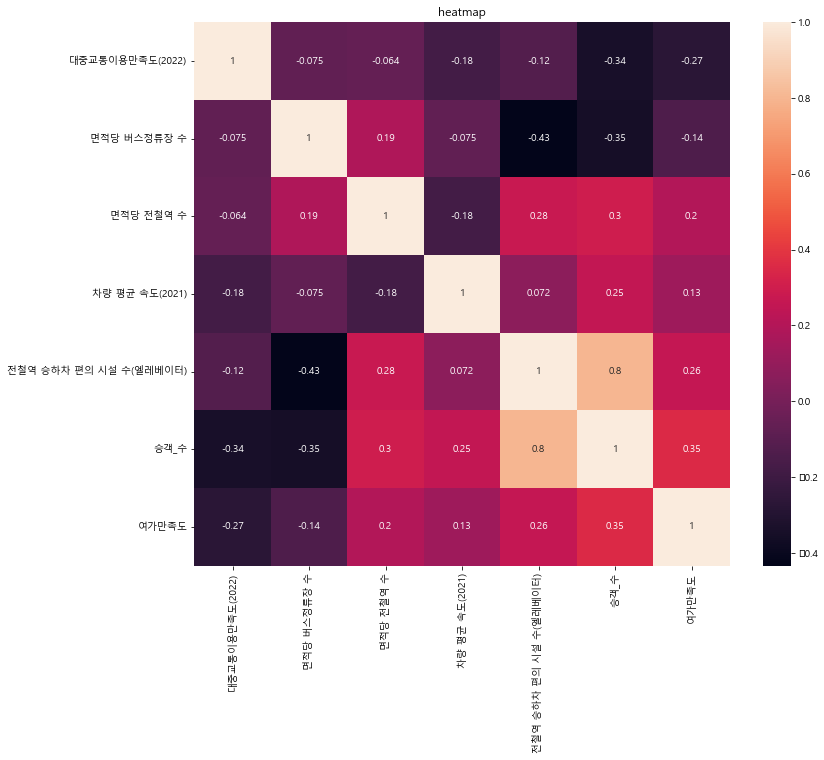

In [85]:
plt.figure(figsize=(12, 10))  # 그림 크기 설정
sns.heatmap(df.corr(), annot=True)  # annot=True로 데이터 값 표시, cmap은 색상맵 설정
plt.title('교통편의 heatmap')  # 그래프 제목 설정
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [74]:
# List of column names for which to calculate correlations
column_names = df.columns

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=column_names)

X = scaled_df.drop(['여가만족도'], axis=1)  
y = scaled_df['여가만족도']  


scaled_df

,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),전철역 승하차 편의 시설 수(엘레베이터),승객_수,여가만족도
0,0.222222,0.023477,0.180507,0.555556,1.000000,1.000000,1.000
1,0.693122,0.168814,0.094418,0.314815,0.191176,0.096913,0.500
2,0.809524,0.353399,0.049545,0.018519,0.205882,0.113855,0.500
3,0.740741,0.097382,0.062184,0.370370,0.382353,0.302222,0.750
4,0.592593,0.125480,0.009655,0.722222,0.058824,0.543884,0.625
5,0.428571,0.234586,0.105264,0.574074,0.088235,0.166150,0.875
6,0.613757,1.000000,0.105682,0.296296,0.279412,0.277320,0.000
7,0.634921,0.967540,0.000000,0.277778,0.000000,0.000000,0.625
8,0.640212,0.085804,0.044981,0.370370,0.426471,0.211639,0.875
9,1.000000,0.356906,0.009905,0.018519,0.191176,0.001411,0.125


In [72]:
X_1 = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  여가만족도   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.6337
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.702
Time:                        15:56:57   Log-Likelihood:                -2.3886
No. Observations:                  25   AIC:                             18.78
Df Residuals:                      18   BIC:                             27.31
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6818      0.316      2.157      0.045       0.018       1.346
대중교통이용만족도(2022)           -0.2697      0.328     -0.823      0.422      -0.959       0.419
면적당 버스정류장 수               -0.1078      0.229     -0.471      0.643      -0.589       0.373
면적당 전철역 수                  0.2638      0.388      0.680      0.505      -0.552       1.079
차량 평균 속도(2021)             0.0779      0.276      0.283      0.781      -0.501       0.657
전철역 승하차 편의 시설 수(엘레베이터)    -0.0286      0.540     -0.053      0.958      -1.162       1.105
승객_수                       0.2386      0.535      0.446      0.661      -0.885       1.362
==============================================================================
Omnibus:                        0.093   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.283
Skew:                          -0.104   Prob(JB):                        0.868
Kurtosis:                       2.521   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
대중교통이용만족도(2022)           0.273382
면적당 버스정류장 수               0.109317
면적당 전철역 수                 0.267466
차량 평균 속도(2021)            0.078961
전철역 승하차 편의 시설 수(엘레베이터)    0.028977
승객_수                      0.241897
dtype: float64
